# Black Friday Dataset - EDA and Feature Engineering


### Cleaning and preparing data for model training 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#Merge the train and test data sets 
df= df_train.append(df_test)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#Dropping the User_ID column as it makes no sense
#NOTE : axis = 0 :deletes horizontally (rows) , axis=1 : deletes vertically (columns)
df.drop(['User_ID'] , axis=1, inplace=True) 


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

## Data Preprocessing :

Handling categorical data : Convertical categorical to numerical 

Using getdummies , you will have to convert the categorical data to numeric and then delete the categorical column from
the dataset and further add the new converted data to the dataframe , 
so instead , we use map() for making the canges in the existing dataframe itself 

In [10]:
#Converting the Gender categorical data to numerical in the existing dataframe :
df['Gender'] = df['Gender'].map({'F':0 , 'M':1})
df.head()

#or 
#df['Gender'] = pd.getdummies(df['Gender'] , drop_first=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#Handling the next Categorical feature : Age
df['Age'] = df['Age'].map({'0-17':0 ,'18-25':1, '26-35':2, '36-45':3 , '46-50':4 , '51-55':5 , '55+':6 })
df.head(5)

#You can also use labelencoding to convert categorical to numerical
#from sklearn.preprocessing import labelencoder
#model = LabelEncoder()

# ENCODE LABELS IN AGE:
#df['Age'] = model.fit_transform(df['Age'])


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df['Age'].unique()
df['Age'].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

Handling the City Categorical data :

In [14]:
df_city = pd.get_dummies(df['City_Category'])

In [15]:
df_city.head(5)

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [16]:
df = pd.concat([df , df_city] , axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


In [17]:
#df.drop('City_Category' , axis=1, inplace = True)

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


### Handling missing values :

In [19]:
df.isna().sum() #or #df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

FOCUS ON REPLACING MISSING VALUES of Product_Category_2 : 

In [20]:
df['Product_Category_2'].unique() #these are discrete values 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
#Replacing the missing values with mode 
df['Product_Category_2'].mode()[0]

8.0

In [22]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isna().sum() # nan values are filled with the mode value 8.0

0

Replacing the misisng values in Product_category_3 using the same method we used in Product_category_2

In [24]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
df['Product_Category_3'].mode()[0]

16.0

In [27]:
#Now replacing the missing values with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df['Product_Category_3'].isna().sum()

0

In [29]:
df['Purchase'].median()

8047.0

In [30]:
df['Purchase'].fillna(df['Purchase'].median(), inplace = True)

In [31]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,B,4+,1,8,8.0,16.0,8047.0,0,1,0
233595,P00254642,0,2,15,B,4+,1,5,8.0,16.0,8047.0,0,1,0
233596,P00031842,0,2,15,B,4+,1,1,5.0,12.0,8047.0,0,1,0
233597,P00124742,0,4,1,C,4+,0,10,16.0,16.0,8047.0,0,0,1


In [32]:
df.shape

(783667, 14)

HANDLING Stay_In_Current_City_Years CATEGORICAL DATA

In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
#Replacing 4+ with 4
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace('+','')

In [35]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    783667 non-null  float64
 11  A                           783667 non-null  uint8  
 12  B                           783667 non-null  uint8  
 13  C             

As 'Stay_In_Current_City_Years' is an object , we need to convert it to integers 

In [37]:
#Converting 'Stay_In_Current_City_Years' from onject to integer 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    783667 non-null  float64
 11  A                           783667 non-null  uint8  
 12  B                           783667 non-null  uint8  
 13  C             

VISUALIZATION :

In [39]:
df[['Age', 'Purchase']].groupby('Age').min()

,Purchase
Age,
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0
5,12.0
6,12.0


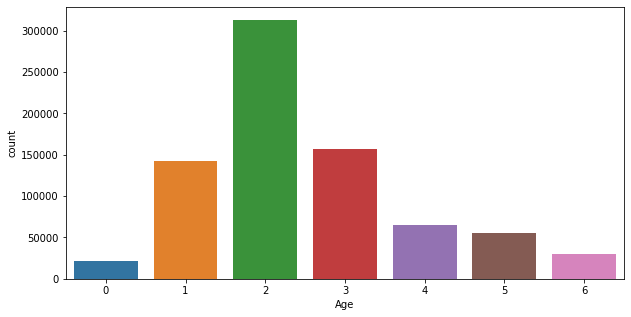

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data=df)
#plt.title('Age v/s Purchase' , fontsize=18)
plt.show()

## observations:
'0-17':0 ,'18-25':1, '26-35':2, '36-45':3 , '46-50':4 , '51-55':5 , '55+':6 
Ages 26 to 35 spent the greatest money

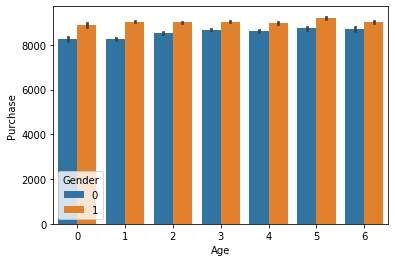

In [41]:
plt.subplot(1,1,1)
##plt.figure(figsize=(10,5))
sns.barplot(x='Age' , y='Purchase',hue='Gender', data=df)
#plt.title('Age v/s Purchase' , fontsize=18)
plt.show()

#plt.subplot(1,2,1)
##plt.figure(figsize=(10,5))
#sns.barplot(x='Age' , y='Purchase',hue = 'Gender', data=df)
#plt.show()


### Gender :
0 : Female 
1 : Male

### Age :
0 : '0-17' ,      1 : '18-25',      2 : '26-35',     3 : '36-45',     4 :'46-50' ,       5 : '51-55',      6 : '55+'

# Observations :
1. Out of both the genders , Male of all age groups spent the most 
2. Women howeve , had a less Purchase spenditure .
3. Most of the Purchases were from the age group : 

In [42]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C'],
      dtype='object')

In [43]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

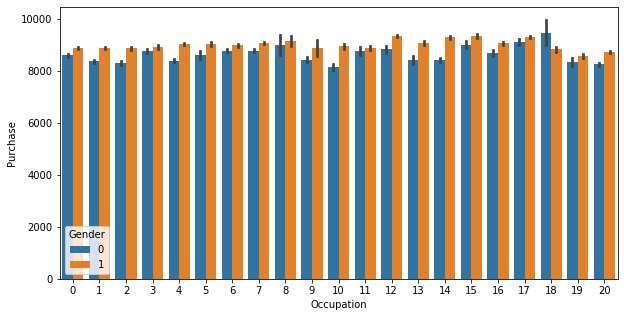

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Purchase' , hue='Gender' , data=df)
plt.show()

#### PRODUCT CATEGORY V/S PURCHASE

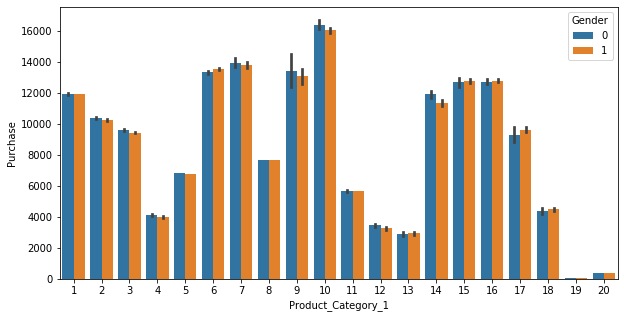

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category_1', y='Purchase' , hue='Gender' , data=df)
plt.show()

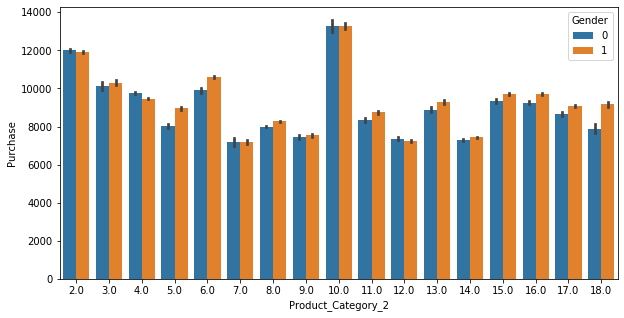

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category_2', y='Purchase' , hue='Gender' , data=df)
plt.show()

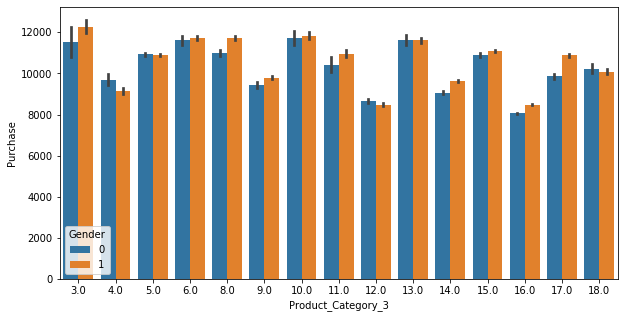

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category_3', y='Purchase' , hue='Gender' , data=df)
plt.show()

# Observations :

1. Highest purchase in Product category 1 was of the 10th Product
2. Out of the Product Category 2 , the 10th product made the highest purchase
3. In Product Category 3, the product 3 made the highest purchase

In [48]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C'],
      dtype='object')

In [49]:
df.Gender.value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

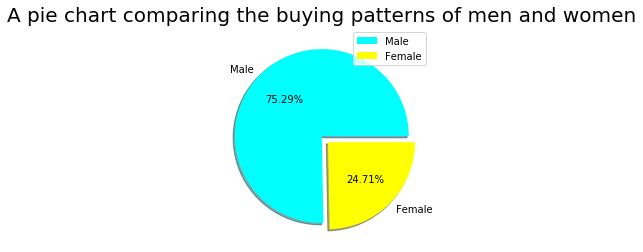

In [50]:
#size = [193636, 590031]
labels = ['Male', 'Female']
colors = ['cyan', 'yellow']
explode = [0, 0.1]

plt.pie(list(df['Gender'].value_counts()), colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A pie chart comparing the buying patterns of men and women', fontsize = 20)
plt.legend()
plt.show()

In [51]:
df.Marital_Status.value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

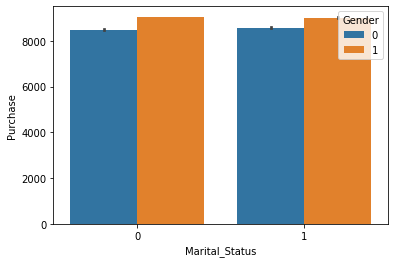

In [52]:
labels = ['Female:0','Male:1']
sns.barplot(x='Marital_Status', y='Purchase' ,hue='Gender' , data=df )
plt.show()

## Observations:
Our observations indicate that men tend to spend more than women, whether they are married or not.

In [53]:
df.City_Category.value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

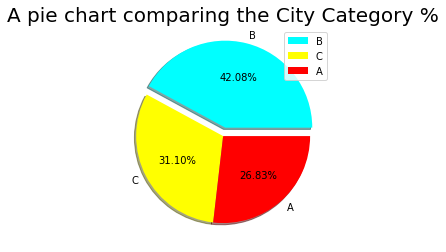

In [54]:
#size = [193636, 590031]
labels = ['B', 'C', 'A']
colors = ['cyan', 'yellow','red']
explode = [0.1, 0.0, 0.0]

plt.pie(list(df['City_Category'].value_counts()), colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A pie chart comparing the City Category %', fontsize = 20)
plt.legend()
plt.show()

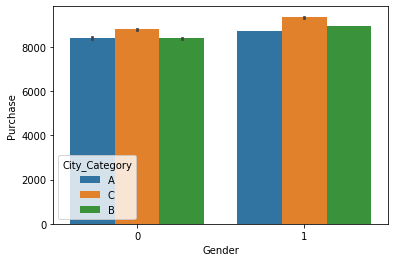

In [55]:
sns.barplot(x='Gender', y='Purchase' , hue='City_Category' , data=df )
plt.show()

# Observations :
The category c has received the most shopping from both men and women in the city category.

In [56]:
df['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

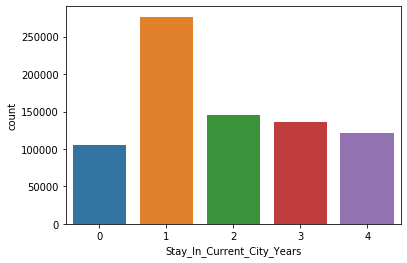

In [57]:
sns.countplot(x='Stay_In_Current_City_Years',data=df )
plt.show()

## Observations:

Most of the people lived in the city for 1 year.

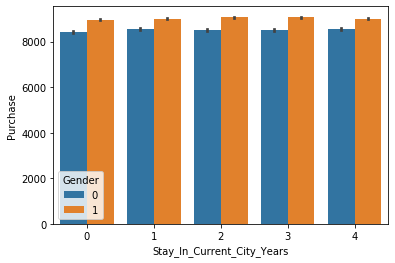

In [58]:
sns.barplot(x='Stay_In_Current_City_Years',y = 'Purchase' ,hue = 'Gender',data=df )
plt.show()

## Observations:
Men had consistently made the largest purchases over the years.

In [59]:
df.City_Category.value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

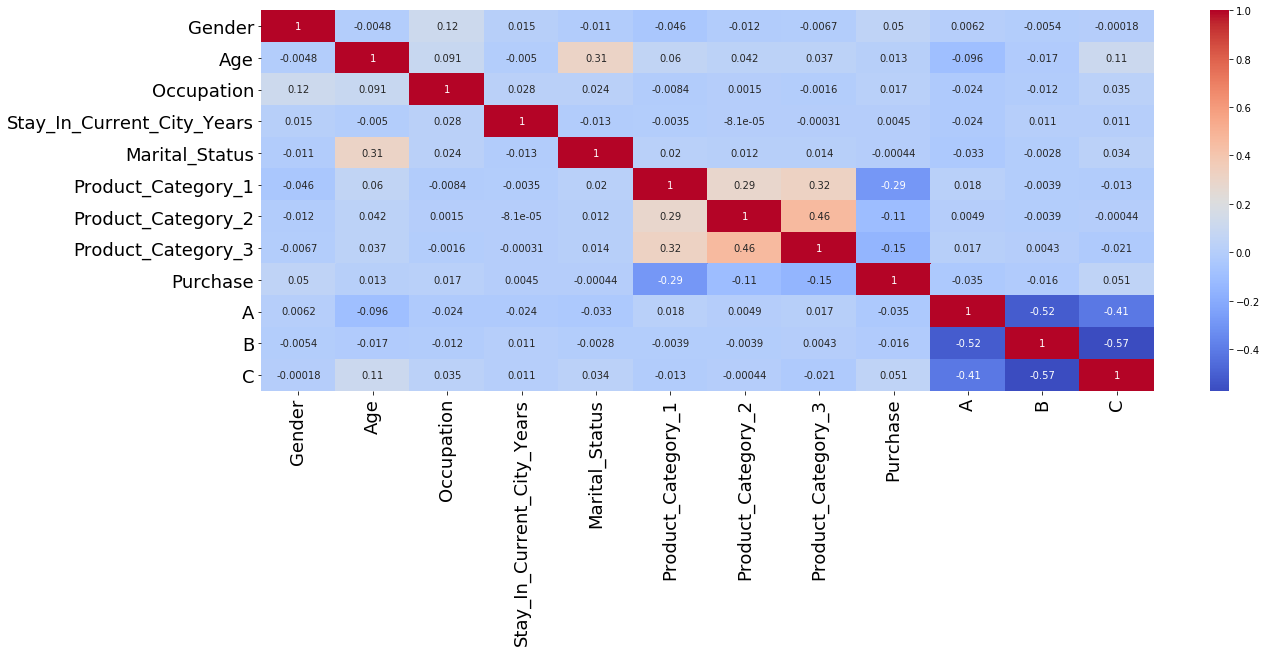

In [60]:
plt.figure(figsize=(20,7))
corr = df.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

## Feature Scaling :

In [61]:
df.drop('City_Category', axis = 1 , inplace = True)

In [62]:
# Here , we set the null values of 'Purchase ' to test data , and all that is not null , to the train data 
#df_test = df[df['Purchase']]

In [63]:
y = df['Purchase']

# now removing the purchase column from the dataset
df = df.drop(['Purchase'], axis = 1)

x = df

In [64]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [65]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (548566, 12)
Shape of x_test:  (235101, 12)
Shape of y_train:  (548566,)
Shape of y_test:  (235101,)


In [66]:
x_train.drop('Product_ID' , axis=1, inplace = True)
x_test.drop('Product_ID' , axis=1, inplace = True)

C:\Users\Shriya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
#X = df_train.drop('Purchase' , axis = 1)

In [69]:
#X.shape #it has 12 columns after dropping the purchase column 

In [70]:
#y = df_train['Purchase'] 

In [71]:
#y.shape #it has just the Purchase column 

In [72]:
#from sklearn.model_selection import train_test_split
#X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 42)

In [73]:
#x_train.head(2)

In [74]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [75]:
print('Intercept parameter:', lm.intercept_)

Intercept parameter: 8903.590697821579


In [76]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 9201.34730449  7995.54629026  9155.84730449 ...  7872.79629026
 10281.84730449  9134.17129026]


In [77]:
from sklearn.model_selection import cross_val_score
cv_score =cross_val_score(lm, x , y, scoring='neg_mean_squared_error' , cv=5)
cv_score = np.abs(np.mean(cv_score))

C:\Users\Shriya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'P00015842'

  FitFailedWarning)
C:\Users\Shriya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'P00069042'

  FitFailedWarning)
C:\Users\Shriya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'P00069042'

  FitFailedWarning)
C:\Users\Shriya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: 

In [78]:
lm.score(x_train, y_train)

0.09122185407836048

In [79]:
lm.score(x_test, y_test)

0.09232837986008802

In [80]:
#from lazypredict.Supervised import LazyRegressor
#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#models.head(10)

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3122.850110743593
R2 Score: 0.4597434828567386


In [82]:
model.score(x_train, y_train)

0.4593958623661454

In [83]:
model.score(x_test, y_test)

0.4597434828567386

In [84]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4067.1293267495025
R2 Score: 0.08362401381981677


In [85]:
from xgboost import XGBRegressor as XGBR
model=XGBR(n_estimators=1000, learning_rate=0.05)
model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

C:\Users\Shriya\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [86]:
y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3111.8236023595414
R2 Score: 0.4635519435459029


In [87]:
model.score(x_train, y_train)

0.4670372155335728

In [88]:
model.score(x_test, y_test)

0.4635519435459029

In [89]:
print('Predictions :' , y_pred)

Predictions : [6859.5186 8504.825  6887.788  ... 7530.5225 9042.847  6490.813 ]


In [90]:
from sklearn.metrics import mean_absolute_error as mae
pred=model.predict(x_test)
print(mae(y_test, pred))
#Get test predictions
pred_test=model.predict(x_test)

2383.354527715345


In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
ridge.fit(x_train, y_train)
#early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)
y_pred = ridge.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4047.7523643132386
R2 Score: 0.09233496590870116


In [92]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(x_train, y_train)
#early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)
y_pred = DT.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3136.5391999511617
R2 Score: 0.454996646579375


In [93]:
from sklearn.tree import DecisionTreeRegressor
RF = DecisionTreeRegressor(max_depth=20, min_samples_leaf=300)
RF.fit(x_train, y_train)
#early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)
y_pred = RF.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE Error: 3133.707765241279
R2 Score: 0.4559801795734184


# Conclusion:
The highest spending age group was 26 to 35. Males spent the greatest money across all age categories across both genders. Women, however, spent less on purchases. The tenth product in Product category 1 had the highest purchase volume. The 10th product in Product Category 2 had the most amount of purchases. The most expensive item in Product Category 3 was purchased. Whether they are married or not, males tend to spend more than women, according to our observations. In the city category, category C has seen the most shopping from both men and women. The majority of residents stayed in the city for one year. Over the years, men have consistently made the biggest purchases. 
Over the years, men have consistently made the biggest purchases. We discovered that XGBRegressor slightly outperforms the others after using several models to train the data.